In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
titanic = sns.load_dataset("titanic")
feature = ["pclass","sex","fare","embarked","age"]
target = ["survived"]

# handling missing data
imp_median = SimpleImputer(strategy = "median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy = "most_frequent")
titanic[["embarked"]] = imp_freq.fit_transform(titanic[["embarked"]])

# encode
le = LabelEncoder()
titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

X = titanic[feature]
y = titanic[target]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 42 )

In [8]:
# model
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("training accuracy:",accuracy_score(y_train,y_pred_train)*100,"%")
print("testing accuracy:",accuracy_score(y_test,y_pred_test)*100,"%")

training accuracy: 97.91332263242376 %
testing accuracy: 76.49253731343283 %


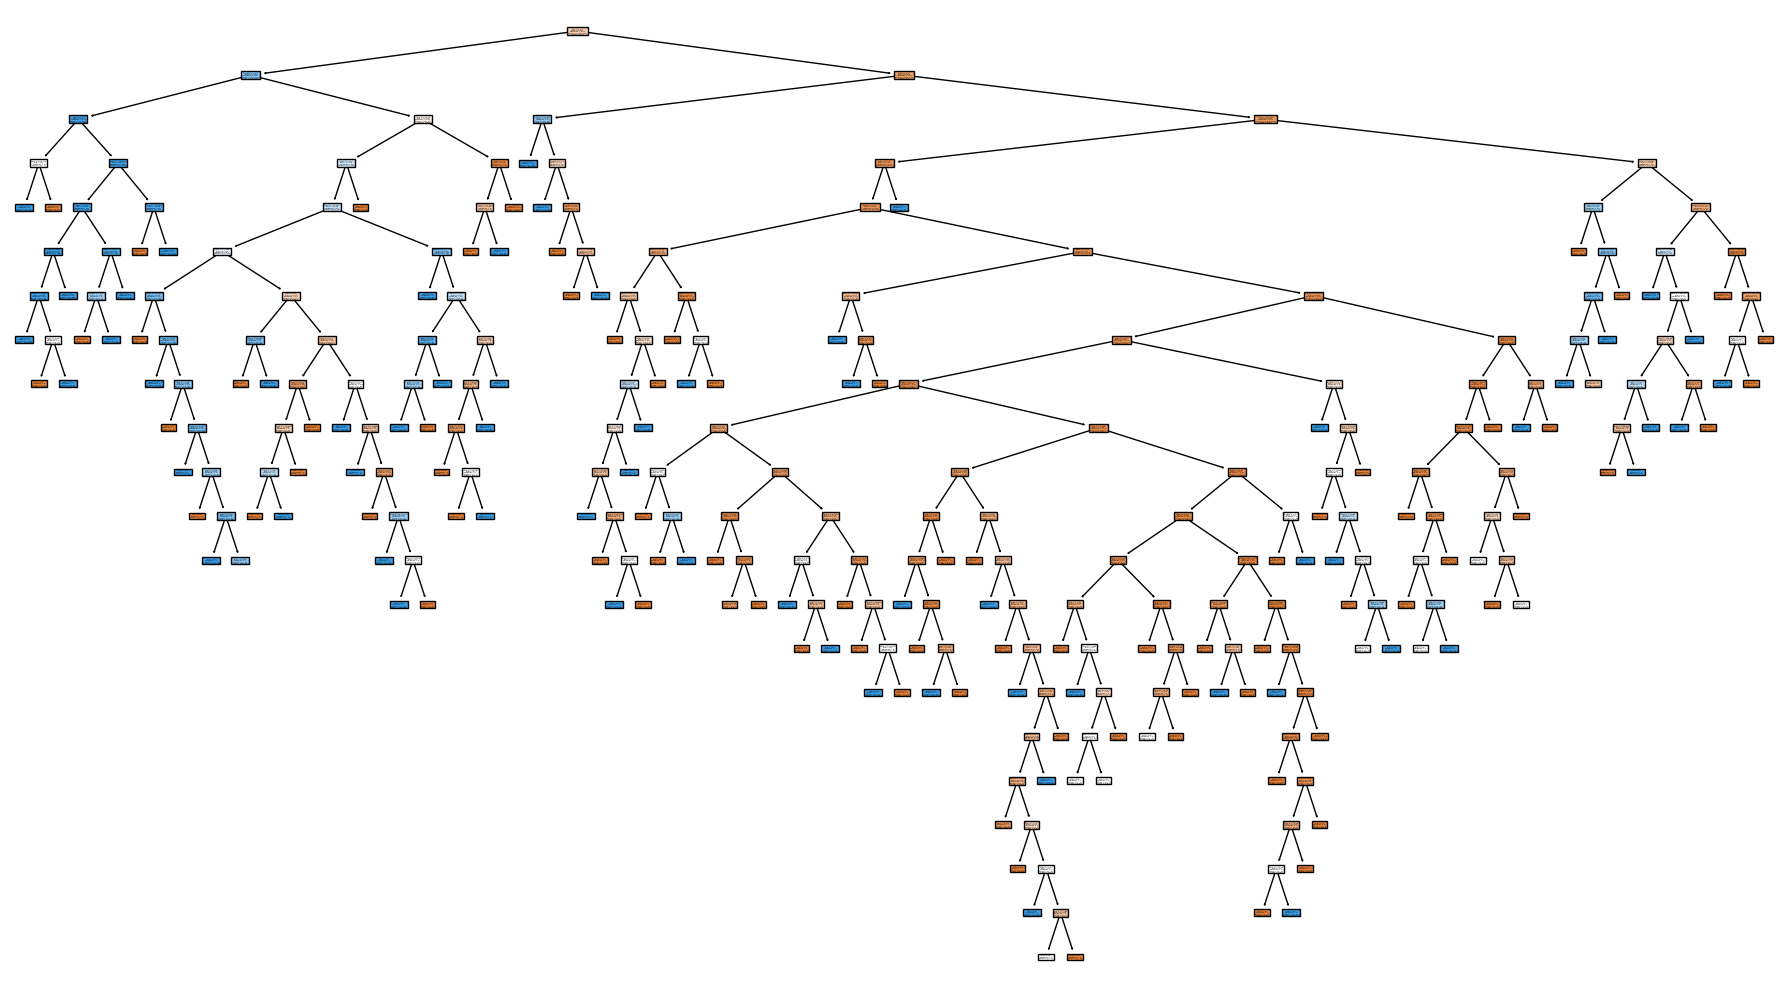

In [9]:
from sklearn.tree import plot_tree

plt.figure(figsize = (18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died","Survived"],
    filled = True
)

plt.tight_layout()

In [15]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=201,
    oob_score = True,
    max_depth = 4
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("OOB Score:", rf.oob_score_*100,"%")
print("testing accuracy:",accuracy_score(y_test,y_pred)*100,"%")

D:\anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


OOB Score: 82.02247191011236 %
testing accuracy: 81.71641791044776 %
